<AxesSubplot:xlabel='Timestamp [ms]'>

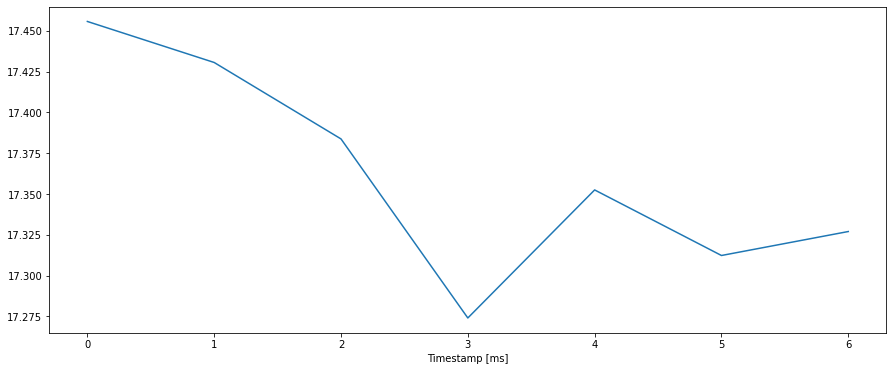

In [1]:
# dataset: http://gwa.ewi.tudelft.nl/datasets/gwa-t-12-bitbrains

import pandas as pd

df = pd.read_csv('44.csv', ';\t', engine='python')
df['cpu_usage'] = df['CPU usage [%]']
df['ram_usage'] = df['Memory usage [KB]'] / df['Memory capacity provisioned [KB]'] * 100
df['Timestamp [ms]'] = pd.to_datetime(df['Timestamp [ms]'], unit='s')
df.set_index('Timestamp [ms]', inplace=True)
keep_columns = ['cpu_usage', 'ram_usage']
df = df[keep_columns]
df.ram_usage.groupby(df.index.dayofweek).mean().plot(figsize=(15,6))
#df['CPU usage [%]'].plot(figsize=(15, 6))

<AxesSubplot:>

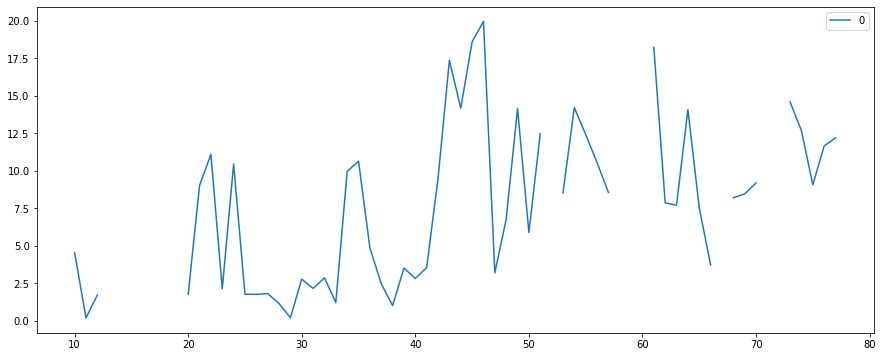

In [55]:
df1.plot(figsize=(15,6))

In [2]:
# import sqlite3
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# database = "../hosts_usage/db.sqlite3"

# datetime = '2020-08-12 20:00:00'

# def ram_usage():

#     conn = sqlite3.connect(database)

#     df = pd.read_sql("select * from ram_usage", con=conn)
#     conn.close()
#     df['ram_usage'] = df.usage / df.total * 100
#     df.drop(columns=['id', 'total', 'usage', 'hosts_id'], inplace=True)
#     df.time = pd.to_datetime(df.time).dt.floor('T')
#     df.set_index('time', inplace=True)
#     filtro = (df.index >= pd.Timestamp(datetime))
#     df = df[filtro]
#     df = df.resample('T').ffill()
#     return df

/home/danilo/dev/python/time_series/.time_series/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Timestamp [ms]'>

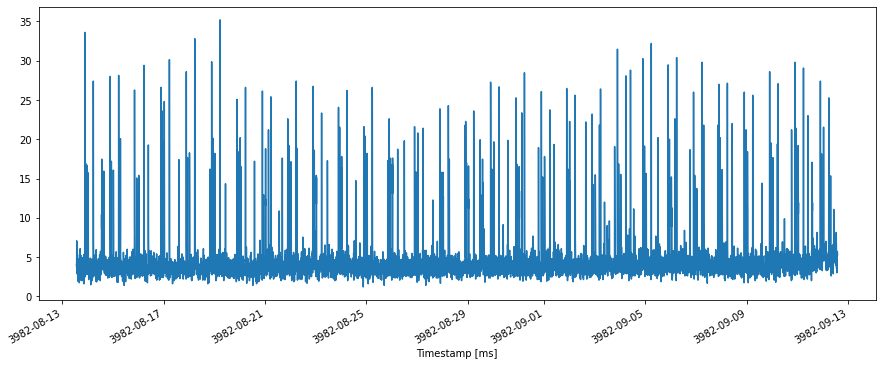

In [3]:
# Ram Usage

df.ram_usage.plot(figsize=(15,6))

<AxesSubplot:xlabel='Timestamp [ms]'>

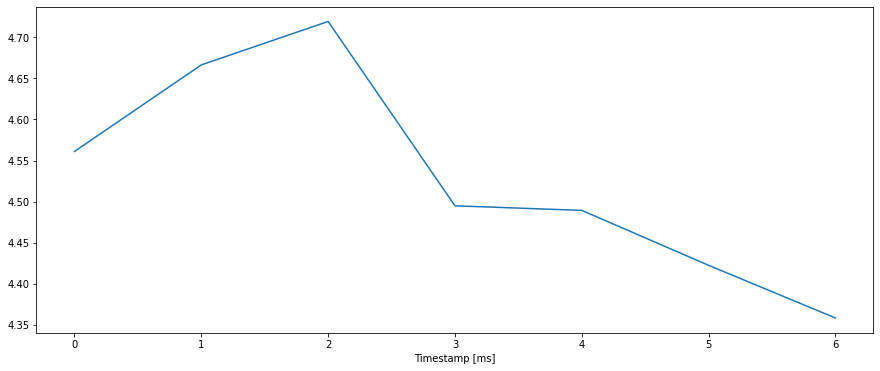

In [8]:
df.ram_usage.groupby(df.index.dayofweek).mean().plot(figsize=(15,6))

<AxesSubplot:xlabel='Timestamp [ms]'>

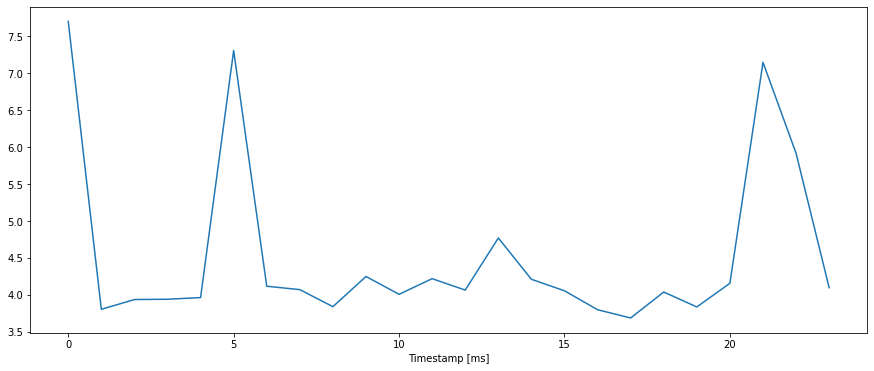

In [16]:
df.ram_usage.groupby(df.index.hour).mean().plot(figsize=(15,6))

/home/danilo/dev/python/time_series/.time_series/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/danilo/dev/python/time_series/.time_series/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Timestamp [ms]'>

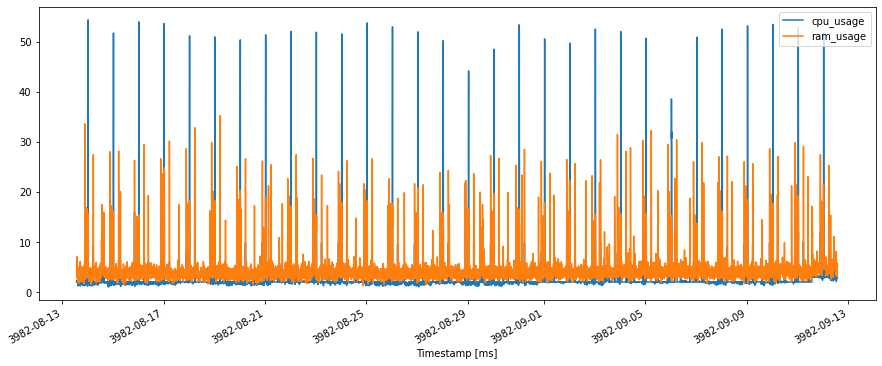

In [4]:
df.plot(figsize=(15, 6))

In [6]:
# O modelo SARIMAX é ideal para séries com valores sazonais

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(df.ram_usage, freq='min', order=(2, 1, 2), seasonal_order=(3, 1, 2, 24)).fit()
(sarima.resid ** 2).mean()

ValueError: The given frequency argument could not be matched to the given index.